# The demonstration of the tropical precipitation module in detailes

# Structure


1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Illustration of some preprocessing possibilities of precipitation diagnostic, such as](#3-illustation-of-some-preprocessing-possibilietes-of-precipitation-diagnostic)

    3.1. [Selection of tropical latitudes](#32-selection-of-tropical-latitudes)

    3.2. [Automatic preprocessing of data](#32-automatic-preprocessing-of-data)

4. [Calculation of histogram of precipitation/tropical precipitation](#4-calculation-of-histogram-of-precipitationtropicalprecipitation)

    4.1. [with manual data preprocessing](#41-diagnostic-with-manual-data-preprocessing)

    4.2 [automatic data preprocessing](#42-diagnostic-with-automatic-data-preprocessing)

    4.3. [with non uniform binning](#43-histogram-with-not-uniform-binning)

    4.4. [Convertation of counts into frequency and PDF](#44-convertation-of-counts-into-frequency-and-pdf) 
    
5. [Calculation time expectation for a total dataset](#5-expected-calculation-time-for-entire-dataset)

6. [Dataset creator and load to the memory](#6-dataset-creator-and-load-to-the-memory)

7. [Plots](#7-plots)

[Go to the end of file](#the-end)

#

## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import  graphic_creator, time_functions
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

#### IFS data

In [2]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r100")
ifs = reader.retrieve(regrid=True)

In [3]:
ifs

<xarray.Dataset>
Dimensions:    (time: 8329, lat: 180, lon: 360, level: 5)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20 ... 2021-01-01
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level      (level) int64 1 2 3 4 5
Data variables: (12/81)
    100si      (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    100u       (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    100v       (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    10u        (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    10v        (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    2d         (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...         ...
    uvb        (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vike       (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vipie      (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vipile     (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vithe      (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    z          (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#### Regriding the small part/chunk of dataset for tests

In [6]:
ifs_chunk = ifs["tprate"][10:30,:]
ifs_chunk

<xarray.DataArray 'tprate' (time: 20, lat: 180, lon: 360)>
dask.array<getitem, shape=(20, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    long_name:                  Mean total precipitation rate
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 2. Initializing the class object and setting the class attributes

In [ ]:
help(TR_PR_Diag)

In [6]:
diag = TR_PR_Diag()

diag.trop_lat = 10

diag.num_of_bins    = 15
diag.first_edge     = 0
diag.width_of_bin   = 1*10**(-4)/diag.num_of_bins
diag.bins           = None


#### User can put specify all attributes during initialization of class object 

In [4]:
diag = TR_PR_Diag(num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 4. Calculation of histogram of precipitation/tropicalprecipitation


### 4.1. Diagnostic with manual data preprocessing

In [7]:
hist_ifs  = diag.histogram(ifs_chunk)
hist_ifs

<xarray.Dataset>
Dimensions:         (left_edge: 15)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 1.241e+05 5.136e+03 ... 328.0 259.0
    trop_frequency  (left_edge) float64 0.8739 0.03616 ... 0.002309 0.001823
    trop_pdf        (left_edge) float64 1.311e+07 5.423e+05 ... 2.735e+04
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    long_name:                  Mean total precipitation rate
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

: 

In [10]:
hist_ifs  = diag.histogram(ifs, s_time = 20, f_time = 30)
hist_ifs

<xarray.Dataset>
Dimensions:         (left_edge: 15)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 6.277e+04 2.373e+03 ... 157.0 119.0
    trop_frequency  (left_edge) float64 0.8818 0.03333 ... 0.002205 0.001672
    trop_pdf        (left_edge) float64 1.323e+07 5e+05 ... 3.308e+04 2.507e+04
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#### We can use `bins` attribute instead of  `num_of_bins`,    `first_edge`,    `width_of_bin`

In [13]:
diag.num_of_bins, diag.first_edge, diag.width_of_bin = None, None, None
n=15
bins = [i*1*10**(-6)/n for i in range(0, n)]

In [14]:
hist_ifs_trop  = diag.histogram(ifs_chunk,  preprocess = False, bins=bins)
hist_ifs_trop

<xarray.Dataset>
Dimensions:         (left_edge: 14)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 8e-07 8.667e-07
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) int64 1195838 35754 16505 ... 1327 1072 916
    trop_frequency  (left_edge) float64 0.9298 0.0278 ... 0.0008335 0.0007122
    trop_pdf        (left_edge) float64 1.395e+07 4.17e+05 ... 1.068e+04
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    long_name:                  Mean total precipitation rate
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 4.2. Diagnostic with automatic data preprocessing

In [50]:
diag = TR_PR_Diag()


diag.num_of_bins = 15
diag.first_edge = 0
diag.width_of_bin = 1*10**(-4)/diag.num_of_bins

diag.trop_lat = 10
diag.s_time = 10
diag.f_time = 20

#### OR

In [15]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10, f_time = 20, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)


In [16]:
hist_ifs_prepr  = diag.histogram(ifs)
hist_ifs_prepr 

<xarray.Dataset>
Dimensions:         (left_edge: 15)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 6.136e+04 2.763e+03 ... 171.0 140.0
    trop_frequency  (left_edge) float64 0.8659 0.03899 ... 0.002413 0.001976
    trop_pdf        (left_edge) float64 1.299e+07 5.849e+05 ... 2.964e+04
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [ ]:
#hist_ifs_prepr  = diag.histogram(ifs, trop_lat = 10, s_month=3,  f_month=4)
#hist_ifs_prepr 
#Exception: Test failed

In [ ]:
diag = TR_PR_Diag(trop_lat = 10, s_time = '2020:01', f_time ='2020/03/20/12', num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

hist_ifs_prepr  = diag.histogram(ifs)
hist_ifs_prepr 

In [18]:
hist_ifs_prepr  = diag.histogram(ifs, trop_lat = 10, s_time = '2020', f_time ='2020.03.20')
hist_ifs_prepr 

: 

: 

### 4.3. Histogram with not uniform binning

In [14]:
#bins = numpy.logspace(-9, -6, 15)
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
       7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
       5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
       3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [15]:
diag = TR_PR_Diag(bins = bins, s_time = 10, f_time = 30)

In [16]:
hist_ifs_trop_logspaced  = diag.histogram(ifs_chunk, preprocess=False, bins=bins)
hist_ifs_trop_logspaced

<xarray.DataArray (left_edge: 14)>
array([826501, 904330, 971338, 994507, 912120, 703004, 461945, 289736,
       197269, 155523, 137858, 125026, 111833,  98421])
Coordinates:
  * left_edge  (left_edge) float64 1e-09 1.638e-09 ... 3.728e-07 6.105e-07
    width      (left_edge) float64 6.379e-10 1.045e-09 ... 2.378e-07 3.895e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 4.5 Weighted histograms

##### Weights

In [32]:
reader.grid_area

<xarray.DataArray 'cell_area' (lat: 1800, lon: 3600)>
dask.array<open_dataset-4aeb6b2f3d9786709de8e84b837b8c0fcell_area, shape=(1800, 3600), dtype=float64, chunksize=(1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
    time     datetime64[ns] ...
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2

In [35]:
diag = TR_PR_Diag( trop_lat=10,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15, s_time=10, f_time=11)

In [36]:
hist_ifs_trop_weighted_np  = diag.histogram(ifs, weights=reader.grid_area)
hist_ifs_trop_weighted_np

<xarray.DataArray (left_edge: 20)>
array([8.25643788e+13, 1.60828485e+12, 8.06992514e+11, 5.12403666e+11,
       3.71242019e+11, 2.89873338e+11, 2.25050589e+11, 1.94161629e+11,
       1.58977322e+11, 1.41424812e+11, 1.25073390e+11, 1.02949126e+11,
       9.63070419e+10, 8.78225386e+10, 8.17935548e+10, 7.70049972e+10,
       7.18555064e+10, 5.60820218e+10, 5.78097681e+10, 4.79813371e+10])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 5. Expected calculation time for entire dataset

####  Checking the calculation time of a small chunk of the dataset

In [22]:
result = %timeit -r 2 -n 1 -o  diag.histogram(ifs_chunk,  preprocess = False)
time_fast_reg, time_fast_reg_stdev =  result.average, result.stdev 

9.43 s ± 802 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


#### Estemated calculation time of entire dataset

In [23]:
from aqua.benchmark.time_functions import estimated_total_calc_time as estimated_total_calc_time
from aqua.benchmark.time_functions import optimal_amount_of_timesteps as optimal_amount_of_timesteps

In [24]:
estimated_total_calc_time(ds_part = ifs_chunk, calc_time = time_fast_reg, ds_full = ifs,  units='D')

(3928.526136917909, 0.04546905251062394)

#### Optimal amount of timesteps

In [25]:
optimal_amount_of_timesteps(ds_part = ifs_chunk, calc_time = time_fast_reg,  ds_full = ifs, wanted_time ='3H')

(2.7491226031330536, 22897)

## 6. Dataset creator and load to the memory

##### Loading to the memory

##### Reading from the memory

#

## 7. Plots

#### Plot of obtained histogram 

##### Histogram of counts (`frequency=False, pdf = False`) + smooth linestyle (`smooth = True`)

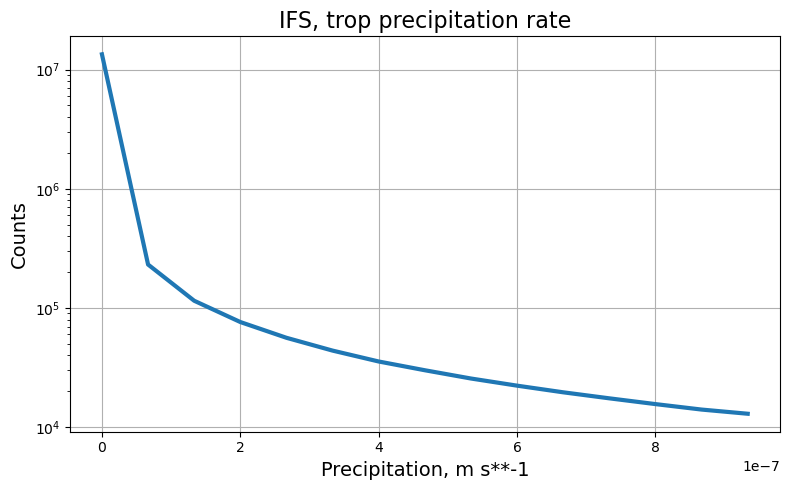

In [27]:
diag.hist_plot(hist_ifs, frequency=False, pdf = False, smooth = True, step = False, viridis = False,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Histogram of frequency (`frequency=True`) + step linestyle (`step = True`)

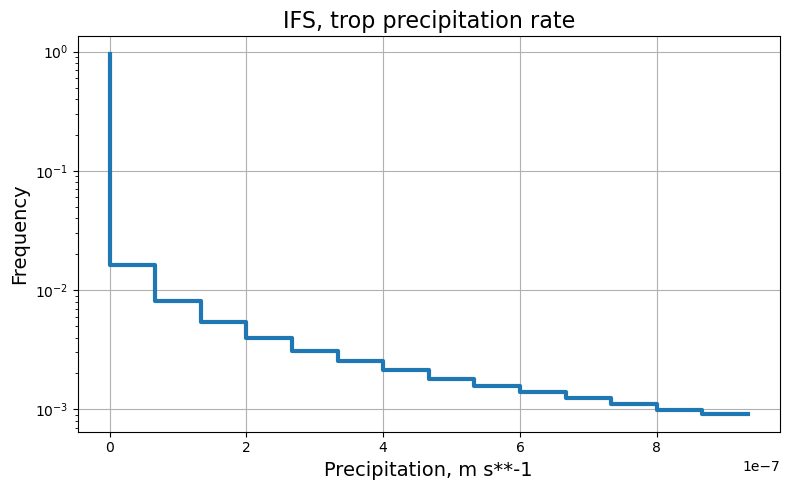

In [28]:
diag.hist_plot(hist_ifs,  frequency=True, pdf = False, smooth = False, step = True, viridis = False,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Histogram of PDF  (`pdf=True`) + viridis style (`smooth = False, step = False`)

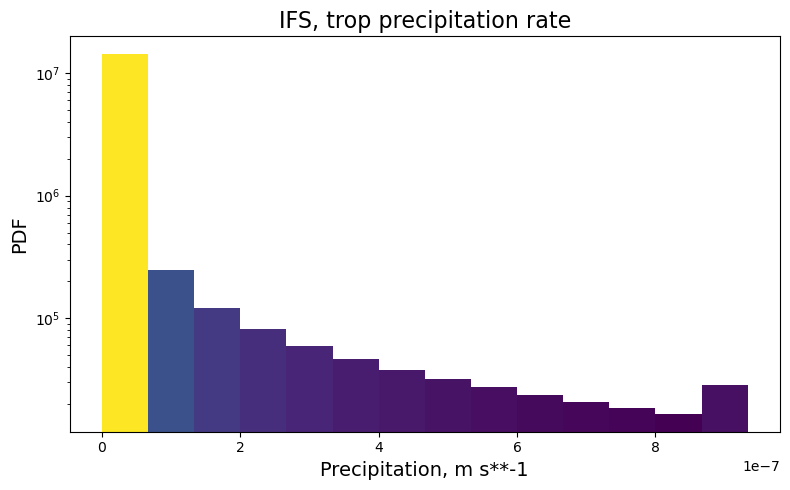

In [29]:
diag.hist_plot(hist_ifs,  frequency=False, pdf = True, smooth = False, step = False, viridis = True,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Default arguments of plot function

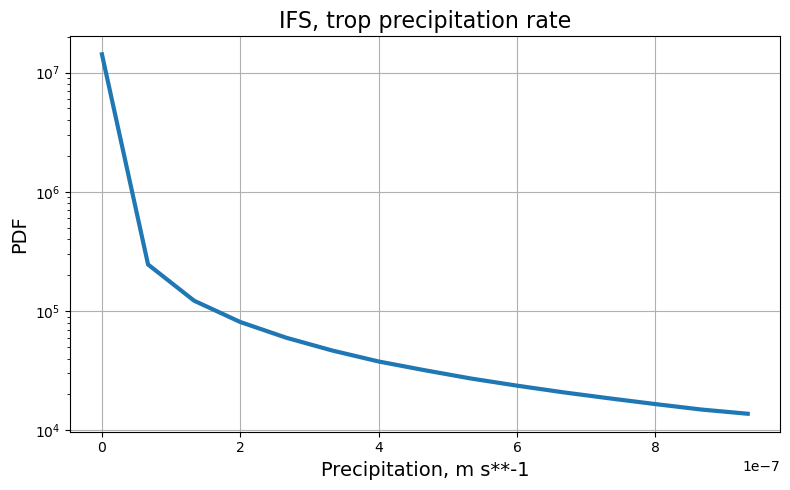

In [30]:
diag.hist_plot(hist_ifs_trop, weights=None, frequency = False, pdf = True, smooth = True, step = False, viridis = False, 
               ls = '-', xlogscale = False, color = 'tab:blue', save = True, 
                label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

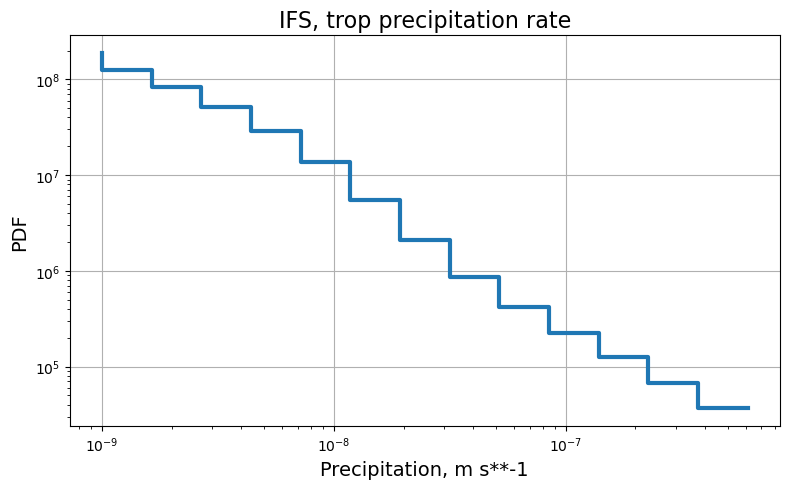

In [31]:
diag.hist_plot(hist_ifs_trop_logspaced, frequency = False, pdf = True, step=True, smooth = False, xlogscale=True, \
                label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Weighted values of precipitation

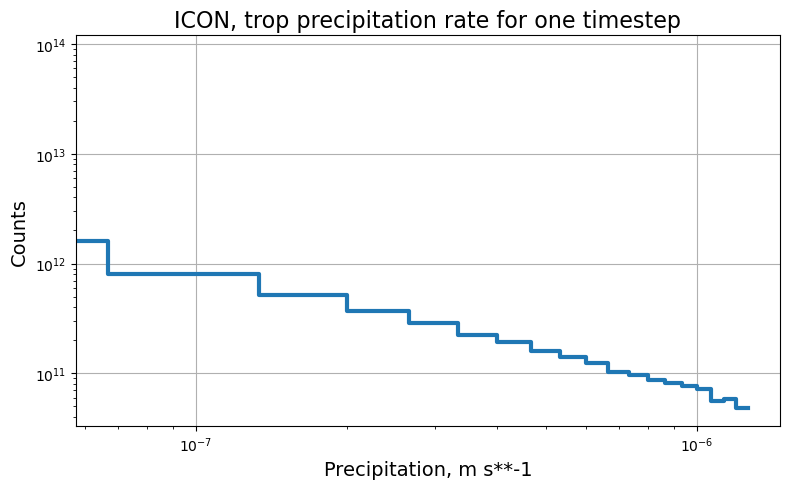

In [39]:
diag.hist_plot(hist_ifs_trop_weighted, frequency = False, pdf = False, step=True, smooth = False, xlogscale=True, \
                label='ICON/ICON_trop_log', plot_title = "ICON, trop precipitation rate for one timestep")

### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

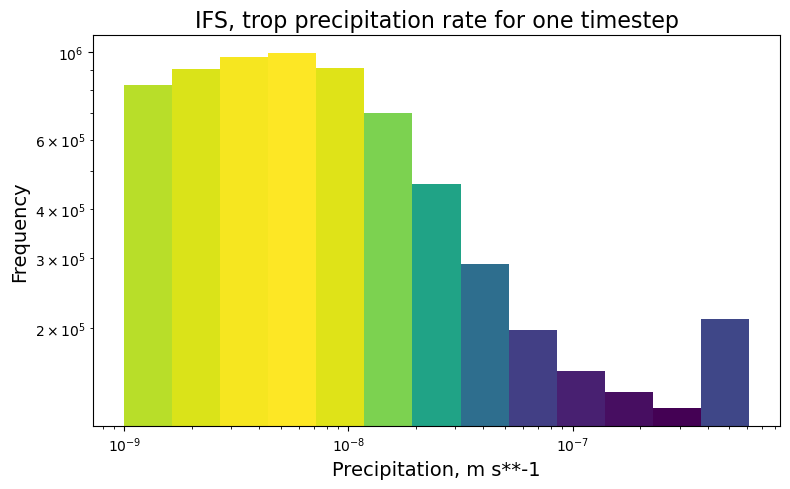

In [27]:
diag.hist_plot(hist_ifs_trop_logspaced, pdf = False, smooth = False, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### OR

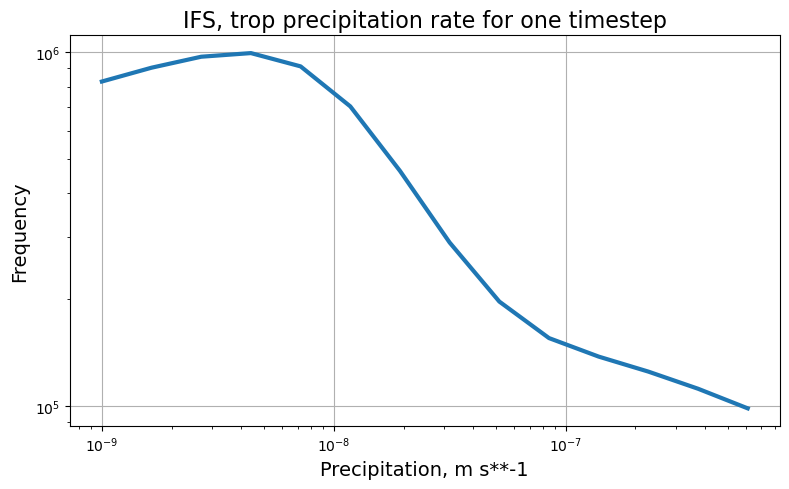

In [28]:
diag.hist_plot(hist_ifs_trop_logspaced, pdf = False, smooth = True, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### Plot of mean and median value of precipitation rate

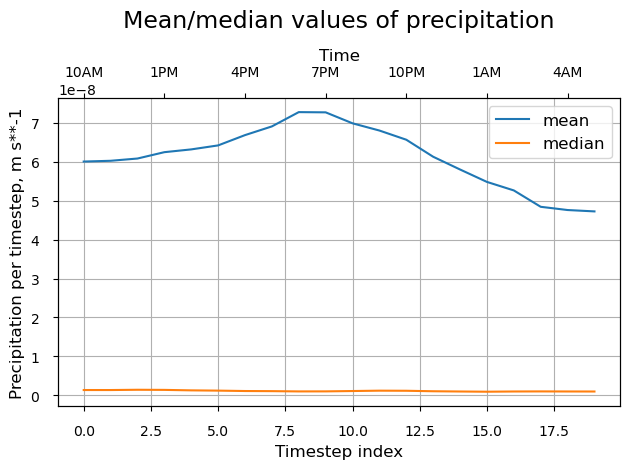

In [29]:
diag.mean_and_median_plot(ifs_chunk, savelabel = 'IFS/IFS')

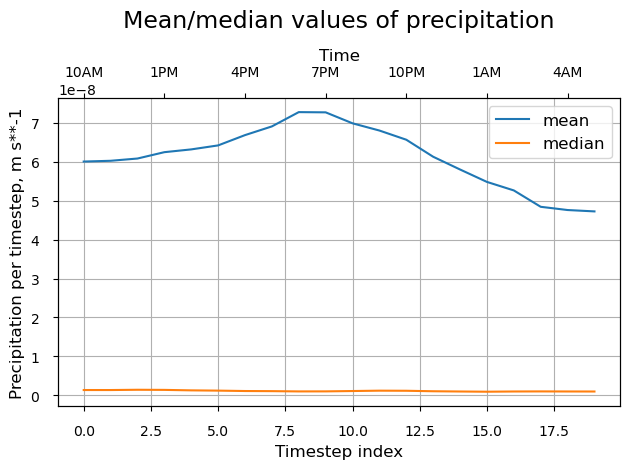

In [30]:
diag.mean_and_median_plot(ifs_chunk_trop, savelabel = 'IFS/IFS_trop')

#### The end